In [3]:
from lmmNet import lmmNet

import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt

# 1. Create training data

Here we test the problem on the 2-D Cubic Harmonic Oscillator

$$ \begin{array}
\dot{x_1} & = & -0.1 x_1^3 + 2.0 x_2^3 \\
\dot{x_2} & = & -2.0 x_1^3 - 0.1 x_2^3 \\
\end{array} $$

with the initial conditions $x_1(0) = 2, x_2(0) = 0$.

In [4]:
def f(x,t):
    """
    Return the derivatives (RHS of the ODE)
    This is a linear system with the form f = A x
    Args:
    x -- a 2 x 1 vector of measurements
    """
    A = np.array([[-0.1, 2], [-2,-0.1]]) # 2 x 2

    return np.ravel(np.matmul(A,x.reshape(-1, 1)**3))

Now we are ready to create the training dataset by integrating the above system of equations to obtain the measurements. We also introduce a Gaussian noise to the dataset.

In [5]:
# create time points
time_points = np.arange(0, 25, 0.01)

# specify initial conditions
x0 = np.array([2,0])

simulated_x = odeint(f, x0, time_points)

In [6]:
# create training data

noise = 0.00 #strength of the noise

skip = 1
dt = time_points[skip] - time_points[0]
X_train = simulated_x[0::skip,:]
X_train = X_train + noise * X_train.std(0) * np.random.randn(X_train.shape[0], X_train.shape[1])

X_train = np.reshape(X_train, (1,X_train.shape[0],X_train.shape[1]))

This notebook was developed with LMMNet v1.1. From preliminary experiments, it seems that 10,000 epochs are sufficient to get a loss that more or less converges.

In [7]:
X_train.shape

(1, 2500, 2)

In [13]:
def ml_f(x):
    """
    Define the derivatives (RHS of the ODE) learned by ML
    I think this is the best implementation (more robust than flatten())
    """
    return np.ravel(model.predict(x.reshape(1,-1)))
    
#predicted_traj = odeint(lambda x, t: ml_f(x), x0, time_points)

# 2. Verification of results

Here we verify our results against Figure 3 of [Keller & Du, 2020](https://arxiv.org/abs/1912.12728). Note that they used **very refined mesh**.

In [16]:
# right now the layers are hardcoded.
schemes = ['AB', 'BDF', 'AM']
N_Iter = 10000
errors = {} #store L1-norm of MAE at every grid point

for M in [1, 2, 3, 4, 5]:
    for scheme in schemes:
        model = lmmNet(dt, X_train, M, scheme)
        model.train(N_Iter)
    
        errors[scheme + str(M)] = [np.sum(abs(ml_f(y) - f(y, None))) for y in X_train[0,:,:]]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch: 0, Loss: 6.679e-04, Time: 0.16
Epoch: 100, Loss: 2.812e-04, Time: 6.36
Epoch: 200, Loss: 2.804e-04, Time: 12.46
Epoch: 300, Loss: 2.797e-04, Time: 19.41
Epoch: 400, Loss: 2.791e-04, Time: 26.43
Epoch: 500, Loss: 2.785e-04, Time: 33.68
Epoch: 600, Loss: 2.780e-04, Time: 40.43
Epoch: 700, Loss: 2.775e-04, Time: 47.25
Epoch: 800, Loss: 2.770e-04, Time: 54.07
Epoch: 900, Loss: 2.764e-04, Time: 61.32
Epoch: 1000, Loss: 2.757e-04, Time: 68.34
Epoch: 1100, Loss: 2.746e-04, Time: 75.62
Epoch: 1200, Loss:

Epoch: 5900, Loss: 1.200e-07, Time: 444.60
Epoch: 6000, Loss: 1.146e-07, Time: 451.73
Epoch: 6100, Loss: 1.066e-07, Time: 459.74
Epoch: 6200, Loss: 1.009e-07, Time: 466.40
Epoch: 6300, Loss: 9.616e-08, Time: 474.14
Epoch: 6400, Loss: 9.121e-08, Time: 482.31
Epoch: 6500, Loss: 8.663e-08, Time: 489.30
Epoch: 6600, Loss: 8.265e-08, Time: 496.52
Epoch: 6700, Loss: 7.897e-08, Time: 503.37
Epoch: 6800, Loss: 7.558e-08, Time: 510.58
Epoch: 6900, Loss: 7.244e-08, Time: 518.57
Epoch: 7000, Loss: 7.000e-08, Time: 526.47
Epoch: 7100, Loss: 6.658e-08, Time: 534.67
Epoch: 7200, Loss: 6.598e-08, Time: 542.90
Epoch: 7300, Loss: 6.143e-08, Time: 549.87
Epoch: 7400, Loss: 5.908e-08, Time: 556.80
Epoch: 7500, Loss: 5.714e-08, Time: 563.66
Epoch: 7600, Loss: 5.491e-08, Time: 571.05
Epoch: 7700, Loss: 5.288e-08, Time: 578.26
Epoch: 7800, Loss: 5.065e-08, Time: 585.33
Epoch: 7900, Loss: 4.885e-08, Time: 592.83
Epoch: 8000, Loss: 4.699e-08, Time: 600.16
Epoch: 8100, Loss: 4.607e-08, Time: 607.42
Epoch: 8200

Epoch: 1800, Loss: 1.693e-04, Time: 191.65
Epoch: 1900, Loss: 1.424e-04, Time: 201.42
Epoch: 2000, Loss: 1.013e-04, Time: 211.39
Epoch: 2100, Loss: 6.090e-05, Time: 222.65
Epoch: 2200, Loss: 3.888e-05, Time: 232.19
Epoch: 2300, Loss: 2.817e-05, Time: 241.17
Epoch: 2400, Loss: 2.190e-05, Time: 251.93
Epoch: 2500, Loss: 1.793e-05, Time: 260.71
Epoch: 2600, Loss: 1.474e-05, Time: 270.55
Epoch: 2700, Loss: 1.152e-05, Time: 279.26
Epoch: 2800, Loss: 8.692e-06, Time: 287.99
Epoch: 2900, Loss: 6.430e-06, Time: 297.56
Epoch: 3000, Loss: 4.700e-06, Time: 307.04
Epoch: 3100, Loss: 3.430e-06, Time: 317.53
Epoch: 3200, Loss: 2.531e-06, Time: 326.30
Epoch: 3300, Loss: 1.912e-06, Time: 335.00
Epoch: 3400, Loss: 1.492e-06, Time: 344.03
Epoch: 3500, Loss: 1.205e-06, Time: 354.17
Epoch: 3600, Loss: 1.004e-06, Time: 364.04
Epoch: 3700, Loss: 8.591e-07, Time: 373.91
Epoch: 3800, Loss: 7.502e-07, Time: 384.12
Epoch: 3900, Loss: 6.655e-07, Time: 394.76
Epoch: 4000, Loss: 5.973e-07, Time: 411.54
Epoch: 4100

Epoch: 9300, Loss: 1.325e-08, Time: 819.00
Epoch: 9400, Loss: 1.278e-08, Time: 826.88
Epoch: 9500, Loss: 1.233e-08, Time: 834.83
Epoch: 9600, Loss: 1.190e-08, Time: 842.74
Epoch: 9700, Loss: 1.150e-08, Time: 850.72
Epoch: 9800, Loss: 1.111e-08, Time: 858.66
Epoch: 9900, Loss: 1.075e-08, Time: 866.65

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch: 0, Loss: 6.391e-04, Time: 0.12
Epoch: 100, Loss: 2.757e-04, Time: 7.97
Epoch: 200, Loss: 2.751e-04, Time: 15.81
Epoch: 300, Loss: 2.745e-04, Time: 23.65
Epoch: 400, Loss: 2.739e-04, Time: 31.49
Epoch:

Epoch: 5200, Loss: 1.692e-07, Time: 526.51
Epoch: 5300, Loss: 1.567e-07, Time: 536.48
Epoch: 5400, Loss: 1.452e-07, Time: 546.44
Epoch: 5500, Loss: 1.347e-07, Time: 556.40
Epoch: 5600, Loss: 1.251e-07, Time: 566.37
Epoch: 5700, Loss: 1.161e-07, Time: 576.33
Epoch: 5800, Loss: 1.080e-07, Time: 586.34
Epoch: 5900, Loss: 1.005e-07, Time: 596.36
Epoch: 6000, Loss: 9.353e-08, Time: 606.34
Epoch: 6100, Loss: 8.766e-08, Time: 616.35
Epoch: 6200, Loss: 8.127e-08, Time: 626.34
Epoch: 6300, Loss: 7.688e-08, Time: 636.47
Epoch: 6400, Loss: 7.083e-08, Time: 646.63
Epoch: 6500, Loss: 6.691e-08, Time: 656.86
Epoch: 6600, Loss: 6.191e-08, Time: 666.80
Epoch: 6700, Loss: 5.887e-08, Time: 676.76
Epoch: 6800, Loss: 5.427e-08, Time: 686.70
Epoch: 6900, Loss: 5.085e-08, Time: 696.67
Epoch: 7000, Loss: 4.772e-08, Time: 706.77
Epoch: 7100, Loss: 4.480e-08, Time: 716.80
Epoch: 7200, Loss: 4.386e-08, Time: 726.76
Epoch: 7300, Loss: 3.958e-08, Time: 736.73
Epoch: 7400, Loss: 3.725e-08, Time: 746.92
Epoch: 7500

Epoch: 1100, Loss: 2.644e-04, Time: 110.17
Epoch: 1200, Loss: 2.627e-04, Time: 120.19
Epoch: 1300, Loss: 2.591e-04, Time: 130.22
Epoch: 1400, Loss: 2.507e-04, Time: 140.19
Epoch: 1500, Loss: 2.365e-04, Time: 150.17
Epoch: 1600, Loss: 2.157e-04, Time: 160.15
Epoch: 1700, Loss: 1.889e-04, Time: 170.21
Epoch: 1800, Loss: 1.653e-04, Time: 180.26
Epoch: 1900, Loss: 1.461e-04, Time: 190.39
Epoch: 2000, Loss: 1.313e-04, Time: 200.38
Epoch: 2100, Loss: 1.167e-04, Time: 210.36
Epoch: 2200, Loss: 9.791e-05, Time: 220.70
Epoch: 2300, Loss: 7.862e-05, Time: 230.72
Epoch: 2400, Loss: 5.969e-05, Time: 240.79
Epoch: 2500, Loss: 4.142e-05, Time: 250.86
Epoch: 2600, Loss: 2.706e-05, Time: 260.93
Epoch: 2700, Loss: 1.802e-05, Time: 271.03
Epoch: 2800, Loss: 1.312e-05, Time: 281.04
Epoch: 2900, Loss: 1.026e-05, Time: 291.11
Epoch: 3000, Loss: 8.237e-06, Time: 301.16
Epoch: 3100, Loss: 6.618e-06, Time: 311.15
Epoch: 3200, Loss: 5.255e-06, Time: 321.54
Epoch: 3300, Loss: 4.119e-06, Time: 331.67
Epoch: 3400

Epoch: 8600, Loss: 2.972e-08, Time: 1049.30
Epoch: 8700, Loss: 2.923e-08, Time: 1061.55
Epoch: 8800, Loss: 2.872e-08, Time: 1073.73
Epoch: 8900, Loss: 2.824e-08, Time: 1085.85
Epoch: 9000, Loss: 2.776e-08, Time: 1098.00
Epoch: 9100, Loss: 2.734e-08, Time: 1110.13
Epoch: 9200, Loss: 2.683e-08, Time: 1122.24
Epoch: 9300, Loss: 2.874e-08, Time: 1134.33
Epoch: 9400, Loss: 2.592e-08, Time: 1146.42
Epoch: 9500, Loss: 2.547e-08, Time: 1158.56
Epoch: 9600, Loss: 2.507e-08, Time: 1170.71
Epoch: 9700, Loss: 2.460e-08, Time: 1182.84
Epoch: 9800, Loss: 2.424e-08, Time: 1195.00
Epoch: 9900, Loss: 2.376e-08, Time: 1207.23

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the 

Epoch: 4400, Loss: 2.847e-07, Time: 539.22
Epoch: 4500, Loss: 2.550e-07, Time: 551.32
Epoch: 4600, Loss: 2.292e-07, Time: 563.44
Epoch: 4700, Loss: 2.067e-07, Time: 575.57
Epoch: 4800, Loss: 1.869e-07, Time: 588.23
Epoch: 4900, Loss: 1.696e-07, Time: 600.36
Epoch: 5000, Loss: 1.541e-07, Time: 612.44
Epoch: 5100, Loss: 1.405e-07, Time: 624.60
Epoch: 5200, Loss: 1.285e-07, Time: 636.71
Epoch: 5300, Loss: 1.178e-07, Time: 648.80
Epoch: 5400, Loss: 1.083e-07, Time: 661.11
Epoch: 5500, Loss: 9.978e-08, Time: 673.44
Epoch: 5600, Loss: 9.209e-08, Time: 685.64
Epoch: 5700, Loss: 8.515e-08, Time: 697.77
Epoch: 5800, Loss: 7.882e-08, Time: 709.89
Epoch: 5900, Loss: 7.303e-08, Time: 721.98
Epoch: 6000, Loss: 6.786e-08, Time: 734.06
Epoch: 6100, Loss: 6.288e-08, Time: 746.21
Epoch: 6200, Loss: 5.843e-08, Time: 758.37
Epoch: 6300, Loss: 5.433e-08, Time: 770.48
Epoch: 6400, Loss: 5.056e-08, Time: 782.63
Epoch: 6500, Loss: 4.705e-08, Time: 794.86
Epoch: 6600, Loss: 4.385e-08, Time: 807.12
Epoch: 6700

Epoch: 100, Loss: 4.953e-05, Time: 14.46
Epoch: 200, Loss: 4.944e-05, Time: 28.72
Epoch: 300, Loss: 4.936e-05, Time: 43.03
Epoch: 400, Loss: 4.929e-05, Time: 57.27
Epoch: 500, Loss: 4.922e-05, Time: 71.53
Epoch: 600, Loss: 4.915e-05, Time: 86.11
Epoch: 700, Loss: 4.909e-05, Time: 100.39
Epoch: 800, Loss: 4.904e-05, Time: 114.69
Epoch: 900, Loss: 4.900e-05, Time: 128.89
Epoch: 1000, Loss: 4.896e-05, Time: 143.16
Epoch: 1100, Loss: 4.892e-05, Time: 157.50
Epoch: 1200, Loss: 4.889e-05, Time: 171.94
Epoch: 1300, Loss: 4.886e-05, Time: 186.20
Epoch: 1400, Loss: 4.883e-05, Time: 200.44
Epoch: 1500, Loss: 4.880e-05, Time: 214.65
Epoch: 1600, Loss: 4.878e-05, Time: 228.93
Epoch: 1700, Loss: 4.875e-05, Time: 243.16
Epoch: 1800, Loss: 4.872e-05, Time: 257.44
Epoch: 1900, Loss: 4.869e-05, Time: 271.81
Epoch: 2000, Loss: 4.866e-05, Time: 286.16
Epoch: 2100, Loss: 4.861e-05, Time: 300.42
Epoch: 2200, Loss: 4.852e-05, Time: 314.77
Epoch: 2300, Loss: 4.830e-05, Time: 328.94
Epoch: 2400, Loss: 4.732e-

Epoch: 7500, Loss: 3.850e-08, Time: 1073.84
Epoch: 7600, Loss: 3.648e-08, Time: 1088.05
Epoch: 7700, Loss: 3.465e-08, Time: 1102.37
Epoch: 7800, Loss: 3.285e-08, Time: 1116.65
Epoch: 7900, Loss: 3.135e-08, Time: 1131.14
Epoch: 8000, Loss: 2.968e-08, Time: 1145.51
Epoch: 8100, Loss: 2.825e-08, Time: 1159.78
Epoch: 8200, Loss: 2.697e-08, Time: 1174.02
Epoch: 8300, Loss: 2.623e-08, Time: 1188.27
Epoch: 8400, Loss: 2.449e-08, Time: 1202.51
Epoch: 8500, Loss: 2.342e-08, Time: 1216.84
Epoch: 8600, Loss: 2.238e-08, Time: 1231.16
Epoch: 8700, Loss: 2.144e-08, Time: 1245.42
Epoch: 8800, Loss: 2.281e-08, Time: 1259.65
Epoch: 8900, Loss: 1.972e-08, Time: 1273.87
Epoch: 9000, Loss: 1.940e-08, Time: 1288.11
Epoch: 9100, Loss: 2.166e-08, Time: 1302.35
Epoch: 9200, Loss: 1.751e-08, Time: 1316.59
Epoch: 9300, Loss: 1.687e-08, Time: 1330.83
Epoch: 9400, Loss: 1.626e-08, Time: 1345.27
Epoch: 9500, Loss: 1.571e-08, Time: 1359.83
Epoch: 9600, Loss: 1.517e-08, Time: 1374.36
Epoch: 9700, Loss: 1.480e-08, Ti

In [18]:
# save dictionary to file (important)
import pickle

with open('errors.pkl', 'wb') as file:
    pickle.dump(errors, file)

errors['AB5']

[0.5387424349784851,
 0.42079737278441964,
 0.32219790038453966,
 0.24509489794386685,
 0.18173135360691872,
 0.11977306976893676,
 0.06283536522181521,
 0.0490665773985679,
 0.06728735955257381,
 0.08454998778106226,
 0.07744272756741033,
 0.11131761375343707,
 0.11296779153530956,
 0.115137173345909,
 0.12620754654610433,
 0.09964418842487266,
 0.04958497697834208,
 0.032814465808505666,
 0.04527416824274988,
 0.06722102403297381,
 0.07182530841869361,
 0.0656565360701562,
 0.055428254279414335,
 0.045419215377835775,
 0.040971530348781204,
 0.03636591348621143,
 0.02938298135308448,
 0.022116743155378704,
 0.015865658531013294,
 0.01009763204173908,
 0.01416016683031418,
 0.016152437207104242,
 0.031022687311074604,
 0.05643327412838861,
 0.08067992223603504,
 0.09465621156923154,
 0.09045744951465728,
 0.06581235808511376,
 0.062446162041942976,
 0.06972980220117364,
 0.0616856297153614,
 0.07083754461992697,
 0.06859374410810926,
 0.049024665863317995,
 0.02058643604284338,
 0.025

# 3. Validation

You may need to terminate kernel to run the codes below. There are OpenMP issues with TensorFlow 2.0

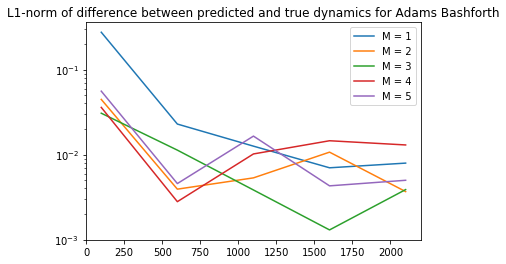

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

grid_points = np.arange(100, 2500, 500).tolist()

with open('errors.pkl', 'rb') as file:
    errors = pickle.load(file)

scheme = 'Adams Bashforth'
plt.title('L1-norm of difference between predicted and true dynamics for ' + scheme)
plt.yscale('log')
plt.plot(grid_points, [errors['AB1'][i] for i in grid_points], label='M = 1')
plt.plot(grid_points, [errors['AB2'][i] for i in grid_points], label='M = 2')
plt.plot(grid_points, [errors['AB3'][i] for i in grid_points], label='M = 3')
plt.plot(grid_points, [errors['AB4'][i] for i in grid_points], label='M = 4')
plt.plot(grid_points, [errors['AB5'][i] for i in grid_points], label='M = 5')
plt.legend()


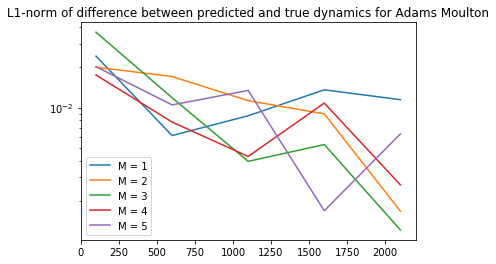

In [17]:
scheme = 'Adams Moulton'
plt.title('L1-norm of difference between predicted and true dynamics for ' + scheme)
plt.yscale('log')
plt.plot(grid_points, [errors['AM1'][i] for i in grid_points], label='M = 1')
plt.plot(grid_points, [errors['AM2'][i] for i in grid_points], label='M = 2')
plt.plot(grid_points, [errors['AM3'][i] for i in grid_points], label='M = 3')
plt.plot(grid_points, [errors['AM4'][i] for i in grid_points], label='M = 4')
plt.plot(grid_points, [errors['AM5'][i] for i in grid_points], label='M = 5')
plt.legend()

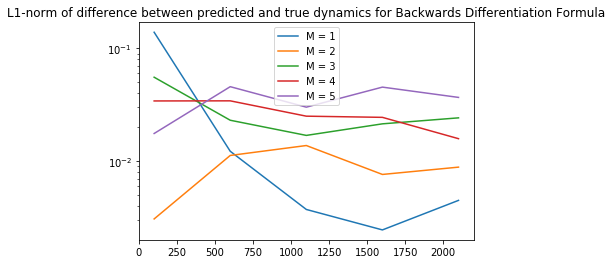

In [18]:
scheme = 'Backwards Differentiation Formula'
plt.title('L1-norm of difference between predicted and true dynamics for ' + scheme)
plt.yscale('log')
plt.plot(grid_points, [errors['BDF1'][i] for i in grid_points], label='M = 1')
plt.plot(grid_points, [errors['BDF2'][i] for i in grid_points], label='M = 2')
plt.plot(grid_points, [errors['BDF3'][i] for i in grid_points], label='M = 3')
plt.plot(grid_points, [errors['BDF4'][i] for i in grid_points], label='M = 4')
plt.plot(grid_points, [errors['BDF5'][i] for i in grid_points], label='M = 5')
plt.legend()

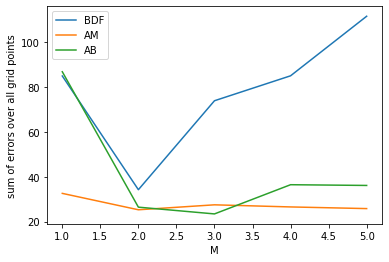

In [21]:
bdf = [np.sum(errors['BDF' + str(i)]) for i in range(1, 6)]
ab = [np.sum(errors['AB' + str(i)]) for i in range(1, 6)]
am = [np.sum(errors['AM' + str(i)]) for i in range(1, 6)]

plt.plot(range(1, 6), bdf, label='BDF')
plt.plot(range(1, 6), am, label='AM')
plt.plot(range(1, 6), ab, label='AB')
plt.xlabel('M')
plt.ylabel('sum of errors over all grid points')
plt.legend()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

time_points = np.arange(0,25,0.01)
with open('test_pred.npy', 'rb') as file:
    test_pred = np.load(file)

def f(x,t):
    """
    Return the derivatives (RHS of the ODE)
    This is a linear system with the form f = A x
    Args:
    x -- a 2 x 1 vector of measurements
    """
    A = np.array([[-0.1, 2], [-2,-0.1]]) # 2 x 2

    return np.ravel(np.matmul(A,x.reshape(-1, 1)**3))

# create time points
time_points = np.arange(0,25,0.01)

# specify initial conditions
x0 = np.array([2,0])

simulated_x = odeint(f, x0, time_points)

Text(0.5, 1.0, 'Trajectories of 2D Cubic Harmonic Oscillator')

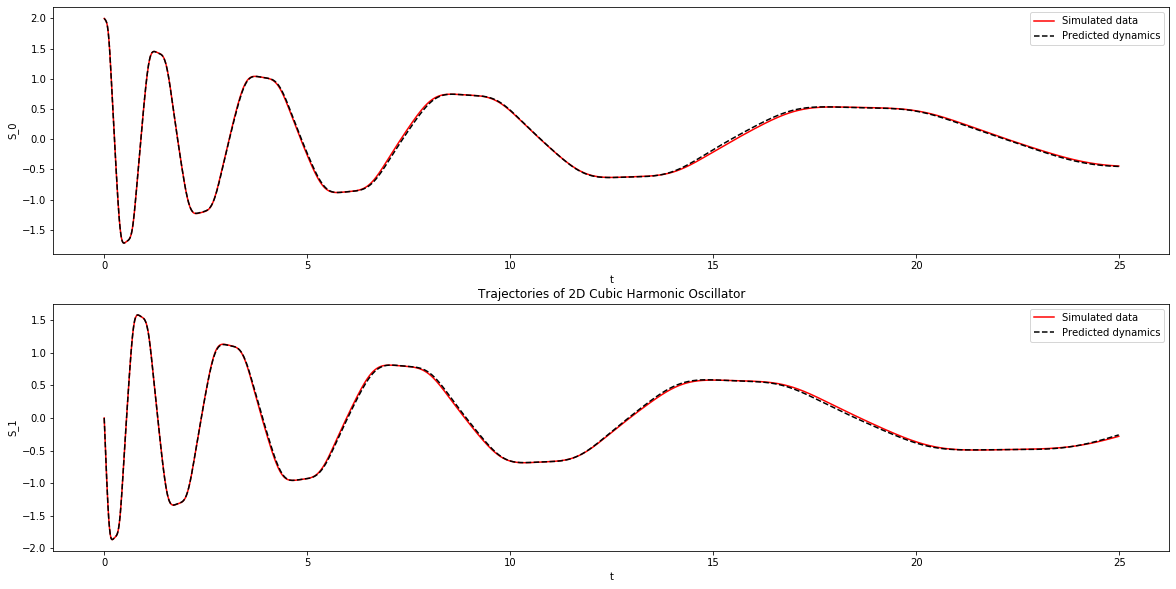

In [3]:

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Cubic Harmonic Oscillator')

Text(0.5, 1.0, 'Phase plane of 2D Cubic Harmonic Oscillator')

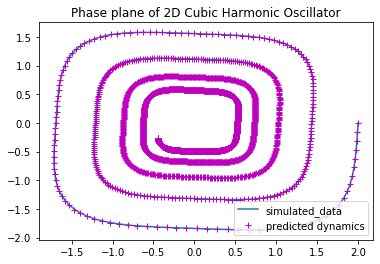

In [4]:
# Phase plane

plt.plot(simulated_x[:,0], simulated_x[:,1], label='simulated_data')
plt.legend()
plt.plot(test_pred[:,0], test_pred[:,1], 'm+', label='predicted dynamics')
plt.legend()
plt.title('Phase plane of 2D Cubic Harmonic Oscillator')